In [2]:
# imports
import numpy as np
import pandas as pd
from datetime import datetime
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.utils import to_categorical, plot_model
import pydot
##TensorBoard
import tensorflow as tf
import datetime, os

ModuleNotFoundError: No module named 'keras'

In [113]:
# %load_ext tensorboard
%reload_ext tensorboard

In [1]:
df = pd.read_csv("../../pre_processing/datasets/backward_filtered_analysis.csv", sep=",")

NameError: name 'pd' is not defined

In [93]:
df.head()

,EVADIDO,BOLSISTA,GRADE_CORRENTE,NOTA_MEDIA,TOT_MAT_CURSADAS,TOT_APROVACOES,TOT_REPROVACOES,TOT_REPROV_FREQ,SIF001,SIF002,...,SIF042,SIF043,SIF047,SIF049,SIF058,SIF063,SIF064,SIF029,SIF006,SIF073
0,0,1,2019,7.0,10,9,1,0,1,1,...,0,0,0,0,0,1,1,4,0,1
1,1,1,2016,5.5,18,15,3,3,1,1,...,1,0,0,0,0,1,1,0,1,0
2,1,0,2014,3.0,12,6,6,0,1,1,...,0,0,0,0,0,0,4,0,4,0
3,1,1,2014,5.1,49,37,12,10,1,1,...,1,1,1,1,1,1,1,1,1,0
4,0,1,2019,5.4,10,8,2,2,1,1,...,0,0,0,0,0,0,1,0,0,1


In [94]:
# Dropo a coluna de RA
df.drop("RA", axis=1, inplace=True)

KeyError: "['RA'] not found in axis"

In [95]:
X = df.iloc[:, df.columns != "EVADIDO"].values

In [96]:
y = df["EVADIDO"]

In [97]:
y = to_categorical(y)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [99]:
scaler_object = MinMaxScaler()

In [100]:
# TODO: Converd years to timestamp to scale after
scaler_object.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [101]:
scaled_X_train = scaler_object.transform(X_train)

In [102]:
scaled_X_test = scaler_object.transform(X_test)

In [103]:
from keras.models import Sequential
from keras.layers import Dense

In [114]:
# Configurate neural network features (layers, layer density, etc)
model = Sequential()
model.add(Dense(units=8, input_dim=24, activation='relu'))
model.add(Dense(units=8, input_dim=24, activation='relu'))
model.add(Dense(units=2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

log_dir = os.path.join("logs/fit/", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 8)                 200       
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 18        
Total params: 290
Trainable params: 290
Non-trainable params: 0
_________________________________________________________________


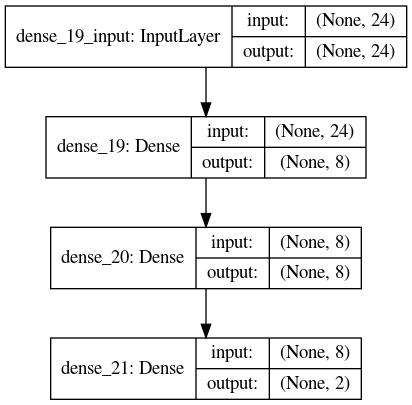

In [106]:
# NN summary
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True) # not running on windows

In [117]:
model.fit(scaled_X_train, y_train, epochs=150, verbose=2, callbacks=[tensorboard_callback])

Epoch 1/150
 - 0s - loss: 0.1778 - accuracy: 0.9258
Epoch 2/150
 - 0s - loss: 0.1777 - accuracy: 0.9258
Epoch 3/150
 - 0s - loss: 0.1776 - accuracy: 0.9288
Epoch 4/150
 - 0s - loss: 0.1763 - accuracy: 0.9258
Epoch 5/150
 - 0s - loss: 0.1759 - accuracy: 0.9288
Epoch 6/150
 - 0s - loss: 0.1775 - accuracy: 0.9258
Epoch 7/150
 - 0s - loss: 0.1755 - accuracy: 0.9288
Epoch 8/150
 - 0s - loss: 0.1762 - accuracy: 0.9288
Epoch 9/150
 - 0s - loss: 0.1739 - accuracy: 0.9258
Epoch 10/150
 - 0s - loss: 0.1774 - accuracy: 0.9288
Epoch 11/150
 - 0s - loss: 0.1821 - accuracy: 0.9228
Epoch 12/150
 - 0s - loss: 0.1733 - accuracy: 0.9318
Epoch 13/150
 - 0s - loss: 0.1742 - accuracy: 0.9407
Epoch 14/150
 - 0s - loss: 0.1731 - accuracy: 0.9288
Epoch 15/150
 - 0s - loss: 0.1734 - accuracy: 0.9258
Epoch 16/150
 - 0s - loss: 0.1732 - accuracy: 0.9377
Epoch 17/150
 - 0s - loss: 0.1735 - accuracy: 0.9258
Epoch 18/150
 - 0s - loss: 0.1739 - accuracy: 0.9318
Epoch 19/150
 - 0s - loss: 0.1700 - accuracy: 0.9288
Ep

In [116]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 53563), started 0:18:01 ago. (Use '!kill 53563' to kill it.)

In [80]:
# Spits out probabilities by default.
model.predict_classes(scaled_X_test)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [81]:
model.evaluate(x=scaled_X_test, y=y_test)

167/167 [==============================] - 0s 114us/step


[0.17792843047997908, 0.940119743347168]

In [82]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [83]:
predictions = model.predict_classes(scaled_X_test)

In [84]:
predictions

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [85]:
# If you use only predictions it will return scaled values between 0 and 1 due to MinMaxScaler... possible
# workaround below
y_test.argmax(axis=1)

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [86]:
print(confusion_matrix(y_test.argmax(axis=1), predictions))

[[92  9]
 [ 1 65]]


In [87]:
print(classification_report(y_test.argmax(axis=1), predictions))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       101
           1       0.88      0.98      0.93        66

   micro avg       0.94      0.94      0.94       167
   macro avg       0.93      0.95      0.94       167
weighted avg       0.95      0.94      0.94       167



In [88]:
print("Model accuracy: ", accuracy_score(y_test.argmax(axis=1), predictions), "%")

Model accuracy:  0.9401197604790419 %


In [26]:
# Save the Neural Network model architecture
now = datetime.now()
current_time = now.strftime("%d%m%Y_%H%M%S")

# Create logic to create folder structure if it doesn't exist!
model.save(f"train_{current_time}_model.h5")

In [28]:
# TODO (URGENTE!!)
# Verificar os scripts de pre-processamento e ajustar a seleção de features para não remover
# a coluna evadido... (Apenas forward apresentou o problema)

Predicted=[9.9987769e-01 1.2227971e-04]
Predicted=[4.501619e-10 1.000000e+00]
Predicted=[5.5623588e-08 1.0000000e+00]
Predicted=[3.202797e-11 1.000000e+00]
Predicted=[9.9999499e-01 4.9989585e-06]
Predicted=[9.9999881e-01 1.2237747e-06]
Predicted=[9.9999619e-01 3.8236535e-06]
Predicted=[9.9999559e-01 4.4407107e-06]
Predicted=[2.4998812e-25 1.0000000e+00]
Predicted=[9.9999893e-01 1.0305984e-06]
Predicted=[7.735660e-08 9.999999e-01]
Predicted=[9.9954516e-01 4.5478254e-04]
Predicted=[3.455241e-09 1.000000e+00]
Predicted=[0.99796546 0.00203456]
Predicted=[1.167531e-09 1.000000e+00]
Predicted=[0.00369074 0.9963092 ]
Predicted=[0.00147551 0.9985245 ]
Predicted=[8.757894e-09 1.000000e+00]
Predicted=[0.2558279  0.74417204]
Predicted=[1.0005087e-09 1.0000000e+00]
Predicted=[9.9997580e-01 2.4162608e-05]
Predicted=[9.9999762e-01 2.4419892e-06]
Predicted=[9.9973768e-01 2.6233436e-04]
Predicted=[1.1642808e-07 9.9999988e-01]
Predicted=[9.9999154e-01 8.4859057e-06]
Predicted=[0.98405564 0.01594438]
Pr

IndexError: index 167 is out of bounds for axis 0 with size 167